In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

<h2>Convolutional Neural Networks</h2>

Convolutional Neural Network is a type of Deep Learning Model that is extenisvely used for image processing applications.![Convolutional Neural Network Structure](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

The CNN models are usually built by stacking up different layers sequentially. I have initialized the model sequentially as seen in the code below.

I have obtained a dataset that contains about 10,000 images that contain cats or dog in different poses with various other objects.

Basically color images can be considered a tensor that contains R,G,B matrices of color intensities(0 to 256, just like audio songs amplitude&frequency) at different places. 

![alt text](https://i.stack.imgur.com/VdqER.png)

<h4> Convolution Step </h4>

I have extracted the R,G,B tensor from all the images and fed it to the model. The convolution layer simple performs matrix multiplication to parts of the image tensor as shown above.

<h4> ReLu Layer</h4>

Since patterns in images are non-linear we have to introduce non-linearity in the information extracted. So we introduce the ReLu layer after the input layer. The ReLu function simply remove the negative pixel values from the image tensor.

<h4> Max Pooling Layer </h4>

The Max Pooling layer slides a image filter over the tensor obtained  and extract the maximum pixel value from parts of the image that is scanned over. The step size will decide how many steps the filter is slided over for each step. The smaller the step size the more the information obtained.

We introduce this layer to extract the important information from the image and to introduce spatial invariance(i.e. We must be able to find the cat no matter where it is)

<h4> Flatten Layer </h4>

The brain of the CNN is a Artificial Neural Network. The input nodes in the ANN require pixel values to be in the form of nodes. The flatten layer does the job of flattening the pixel values into a single array.

<h4> Artificial Neural Network </h4>
The final layer is an Artificial Neural Network which make the prediction based on the trained weights.


<center><h3>Building the CNN</h3></center>

<h4> Convolution Layer </h4>
* Conv2D layer = 32 Feature Detector, each with 3x3 size
* Input_Shape = 64x64 size of the input image. We have reduced this to make our training quicker
* Activation = 'relu' introduces non-linearity to feature maps since the images we work with are not linear 

<h4>MaxPooling Layer </h4>
MaxPooling layer essentially reduces the size/complexity of the feature map while retaining important infomration from the input images which means we have to process lesser information.

* pool_size = 2x2. We keep the size of the sliding window small because we do not want to loose a lot of information

**Flatten Layer**

* We flatten the pixels in the feature map into a linear vector of pixels so that we can feed them into the ANN.

** Artificial Neural Network **
 * The artificial neural network that we have used has 256 nodes in the hidden layer. This choice is random now since we have do not have an exact idea of the number of input nodes we will have after the max pooling layer.

In [0]:
def create_model():
    classifier = Sequential()

    #Adding the Conv2D Layer
    classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

    #Adding the Max Pooling Layer
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    #Adding the Second Convolutional Layer
    classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))


    #Adding the Flatten layers
    classifier.add(Flatten())

    #Adding the Artificial Neural Network
    classifier.add(Dense(output_dim=256, activation= 'relu'))

    #Adding the output layer
    classifier.add(Dense(output_dim=1,activation='sigmoid'))
    
    return classifier

C:\Users\Karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
C:\Users\Karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`




---


<h3> Compiling the Model </h3>

* I have the used the 'adam' algorithm for the gradient descent. This is the main part of the alogrithm that fits classifying hyper plane in the multidimensional data space.

* I have used the 'binary crossentropy' cost function since our model classifies the data within two classes.
* The metrics the model uses for estimating its comparison is 'accuracy'

<h3> Definitions </h3>



*   **Gradient Descent** - It is an iterative trial and error method in which the model tries to draw hyper planes between data to classify them.
*  **Cost Function** - It is a mathematical function that quantitatively measures the difference/distance in the multi-dimensional data space between the data points and the hyper plane.


In [0]:
classifier = create_model()
 
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

<h3>Data Augmentation</h3>

Note: The code from this section is directly taken from the keras Image Preprocessing documentation
section

Since the amount of data required for training the model is not sufficient, I am using Data Augmentation to increase the size of the training dataset.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

<h3>ImageDataGenerator Objects</h3>
<h4>train_datagen</h4>
We create an image for training data augmentation train_datagen that will 
* rescale the image pixel values (0 to 255) to a corresponding decimal value between 0 and 1.

* shear = 0.2 will shear transform (slant) the images by 20%
* zoom_range will zoom the images by 20%
* horizontal flip = true will horizontally flip the input images

<h4>test_datagen</h4>
* this object will simply rescale the pixel values in the images


In [0]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
ls '/content/drive/My Drive/Colab Notebooks/Deep_Learning_A_Z/Part 2/Convolutional_Neural_Networks/dataset/'

single_prediction/  test_set/  training_set/


The target size is the size of the image the CNN will be expecting which must be 64X64<br>
The batch size represents the number of image samples that have to be processed before a single sample in the dataset

In [0]:
train_set = train_datagen.flow_from_directory(
                                              'Replace training set location',
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

test_set = test_datagen.flow_from_directory(
                                            'Replace test set location',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


fit_generator method fits the build network on the training dataset for 25 epochs and validates on the test set

In [0]:
classifier.fit_generator(
                          train_set,
                          steps_per_epoch=8000,
                          epochs=15,
                          validation_data=test_set,
                          validation_steps=2000)

Epoch 1/15
8000/8000 [==============================] - 1938s 242ms/step - loss: 0.3193 - acc: 0.8504 - val_loss: 0.6681 - val_acc: 0.8145
Epoch 2/15
8000/8000 [==============================] - 1824s 228ms/step - loss: 0.0614 - acc: 0.9781 - val_loss: 1.0382 - val_acc: 0.7955
Epoch 3/15
8000/8000 [==============================] - 1748s 219ms/step - loss: 0.0343 - acc: 0.9885 - val_loss: 1.1746 - val_acc: 0.8000
Epoch 4/15
8000/8000 [==============================] - 1786s 223ms/step - loss: 0.0253 - acc: 0.9916 - val_loss: 1.4546 - val_acc: 0.7940
Epoch 5/15
8000/8000 [==============================] - 1878s 235ms/step - loss: 0.0219 - acc: 0.9930 - val_loss: 1.6112 - val_acc: 0.7685
Epoch 6/15
8000/8000 [==============================] - 1798s 225ms/step - loss: 0.0187 - acc: 0.9941 - val_loss: 1.4926 - val_acc: 0.7835
Epoch 7/15
8000/8000 [==============================] - 1938s 242ms/step - loss: 0.0161 - acc: 0.9950 - val_loss: 1.5508 - val_acc: 0.8000
Epoch 8/15
8000/8000 [=====

In [0]:
classifier.save('CNN_improved_trained.h5')

In [0]:
from keras.models import load_model
pretrained_model = load_model('CNN_improved_trained.h5')



---



---

<h3> Testing on Single Test Image </h3>

For loading the single image, we have to prepocess it the same way we did for the entire dataset.

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('D:/Karthik/MS_CS/Machine_Learning/Deep_Learning_A_Z/Part 2/Convolutional_Neural_Networks/dataset/single_prediction/test_1_cat.jpg'
                           ,target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = pretrained_model.predict(test_image)
# train_set.class_indices

In [0]:
if result[0][0]==0:
    print("There's a cat in the picture")
else:
    print("There's a dog in this picture")

There's a cat in the picture


The Image that was used for testing is shown below. BTW he's my cat.

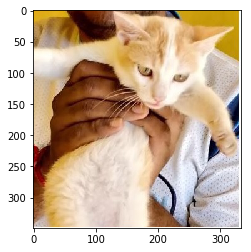

In [0]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img('Replace with the location of test image'))